
Source codes for Python Machine Learning By Example 4th Edition (Packt Publishing)

Chapter 4 Predicting Online Ad Click-Through with Tree-Based Algorithms 

Author: Yuxi (Hayden) Liu (yuxi.liu.ece@gmail.com)


# Converting categorical features to numerical – one-hot encoding and ordinal encoding

In [1]:
from sklearn.feature_extraction import DictVectorizer


X_dict = [{'interest': 'tech', 'occupation': 'professional'},
          {'interest': 'fashion', 'occupation': 'student'},
          {'interest': 'fashion', 'occupation': 'professional'},
          {'interest': 'sports', 'occupation': 'student'},
          {'interest': 'tech', 'occupation': 'student'},
          {'interest': 'tech', 'occupation': 'retired'},
          {'interest': 'sports', 'occupation': 'professional'}]

dict_one_hot_encoder = DictVectorizer(sparse=False)
X_encoded = dict_one_hot_encoder.fit_transform(X_dict)
print(X_encoded)


[[0. 0. 1. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [2]:
print(dict_one_hot_encoder.vocabulary_)


{'interest=tech': 2, 'occupation=professional': 3, 'interest=fashion': 0, 'occupation=student': 5, 'interest=sports': 1, 'occupation=retired': 4}


In [3]:
new_dict = [{'interest': 'sports', 'occupation': 'retired'}]
new_encoded = dict_one_hot_encoder.transform(new_dict)
print(new_encoded)


[[0. 1. 0. 0. 1. 0.]]


In [4]:
print(dict_one_hot_encoder.inverse_transform(new_encoded))


[{'interest=sports': 1.0, 'occupation=retired': 1.0}]


In [5]:
# new category not encountered before
new_dict = [{'interest': 'unknown_interest', 'occupation': 'retired'},
            {'interest': 'tech', 'occupation': 'unseen_occupation'}]
new_encoded = dict_one_hot_encoder.transform(new_dict)
print(new_encoded)


[[0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [6]:
import pandas as pd
df = pd.DataFrame({'score': ['low',
                             'high',
                             'medium',
                             'medium',
                             'low']})
print(df)

mapping = {'low':1, 'medium':2, 'high':3}
df['score'] = df['score'].replace(mapping)

print(df)

    score
0     low
1    high
2  medium
3  medium
4     low
   score
0      1
1      3
2      2
3      2
4      1


# Classifying data with logistic regression 

## Getting started with the logistic function

In [7]:
import numpy as np
import matplotlib.pyplot as plt

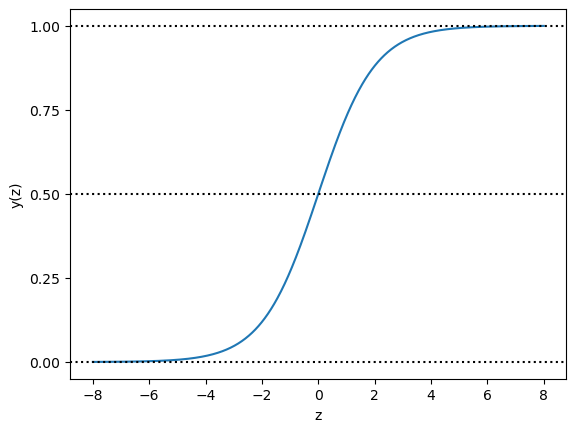

In [8]:
def sigmoid(input):
    return 1.0 / (1 + np.exp(-input))


z = np.linspace(-8, 8, 1000)
y = sigmoid(z)
plt.plot(z, y)
plt.axhline(y=0, ls='dotted', color='k')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.axhline(y=1, ls='dotted', color='k')
plt.yticks([0.0, 0.25, 0.5, 0.75, 1.0])
plt.xlabel('z')
plt.ylabel('y(z)')
plt.show()

## Jumping from the logistic function to logistic regression 

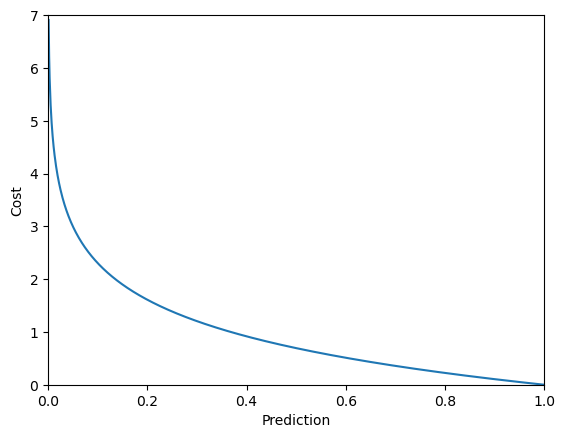

In [9]:
# plot sample cost vs y_hat (prediction), for y (truth) = 1
y_hat = np.linspace(0.001, 0.999, 1000)
cost = -np.log(y_hat)
plt.plot(y_hat, cost)
plt.xlabel('Prediction')
plt.ylabel('Cost')
plt.xlim(0, 1)
plt.ylim(0, 7)
plt.show()

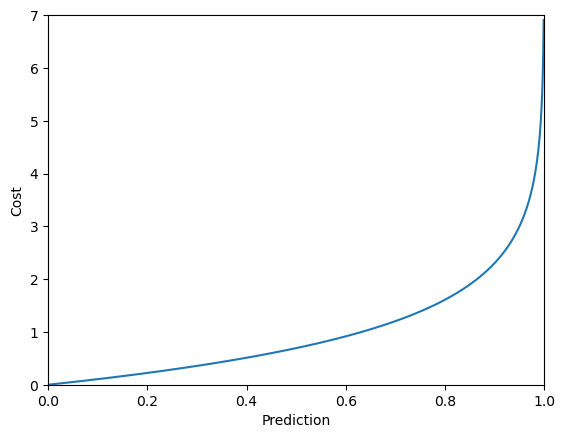

In [10]:
# plot sample cost vs y_hat (prediction), for y (truth) = 0
y_hat = np.linspace(0.001, 0.999, 1000)
cost = -np.log(1 - y_hat)
plt.plot(y_hat, cost)
plt.xlabel('Prediction')
plt.ylabel('Cost')
plt.xlim(0, 1)
plt.ylim(0, 7)
plt.show()

# Training a logistic regression model 

## Training a logistic regression model using gradient descent

In [11]:
# Gradient descent based logistic regression from scratch
def compute_prediction(X, weights):
    """
    Compute the prediction y_hat based on current weights
    """
    z = np.dot(X, weights)
    return sigmoid(z)

In [12]:
def update_weights_gd(X_train, y_train, weights, learning_rate):
    """
    Update weights by one step
    """
    predictions = compute_prediction(X_train, weights)
    weights_delta = np.dot(X_train.T, y_train - predictions)
    m = y_train.shape[0]
    weights += learning_rate / float(m) * weights_delta
    return weights

In [13]:
def compute_cost(X, y, weights):
    """
     Compute the cost J(w)
    """
    predictions = compute_prediction(X, weights)
    cost = np.mean(-y * np.log(predictions) - (1 - y) * np.log(1 - predictions))
    return cost

In [14]:
def train_logistic_regression(X_train, y_train, max_iter, learning_rate, fit_intercept=False):
    """ Train a logistic regression model
    Args:
        X_train, y_train (numpy.ndarray, training data set)
        max_iter (int, number of iterations)
        learning_rate (float)
        fit_intercept (bool, with an intercept w0 or not)
    Returns:
        numpy.ndarray, learned weights
    """
    if fit_intercept:
        intercept = np.ones((X_train.shape[0], 1))
        X_train = np.hstack((intercept, X_train))
    weights = np.zeros(X_train.shape[1])
    for iteration in range(max_iter):
        weights = update_weights_gd(X_train, y_train, weights, learning_rate)
        # Check the cost for every 100 (for example) iterations
        if iteration % 100 == 0:
            print(compute_cost(X_train, y_train, weights))
    return weights

In [15]:
def predict(X, weights):
    if X.shape[1] == weights.shape[0] - 1:
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))
    return compute_prediction(X, weights)

In [16]:
# A example
X_train = np.array([[6, 7],
                    [2, 4],
                    [3, 6],
                    [4, 7],
                    [1, 6],
                    [5, 2],
                    [2, 0],
                    [6, 3],
                    [4, 1],
                    [7, 2]])

y_train = np.array([0,
                    0,
                    0,
                    0,
                    0,
                    1,
                    1,
                    1,
                    1,
                    1])


In [17]:
weights = train_logistic_regression(X_train, y_train, max_iter=1000, learning_rate=0.1, fit_intercept=True)



0.5744042371657099
0.034460223392510314
0.018265572708476157
0.012493458388041109
0.00951532913854744
0.007693388060646923
0.0064620943335143306
0.0055735118468322594
0.004901632254525041
0.004375567740665121


In [18]:
X_test = np.array([[6, 1],
                   [1, 3],
                   [3, 1],
                   [4, 5]])

predictions = predict(X_test, weights)
print(predictions)


[0.9999478  0.00743991 0.9808652  0.02080847]


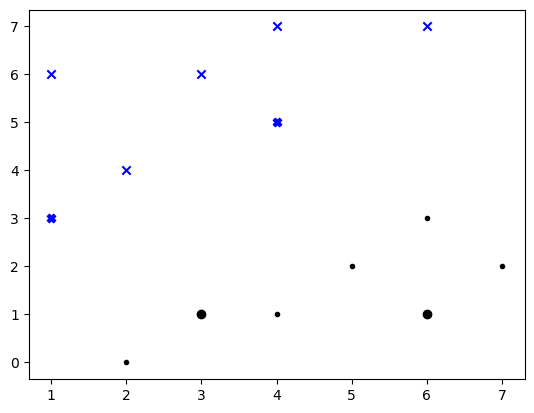

In [19]:
plt.scatter(X_train[:5,0], X_train[:5,1], c='b', marker='x')
plt.scatter(X_train[5:,0], X_train[5:,1], c='k', marker='.')
for i, prediction in enumerate(predictions):
    marker = 'X' if prediction < 0.5 else 'o'
    c = 'b' if prediction < 0.5 else 'k'
    plt.scatter(X_test[i,0], X_test[i,1], c=c, marker=marker)
plt.show()

## Predicting ad click-through with logistic regression using gradient descent 

In [20]:
import pandas as pd
n_rows = 300000
df = pd.read_csv("train.csv", nrows=n_rows)

X = df.drop(['click', 'id', 'hour', 'device_id', 'device_ip'], axis=1).values
Y = df['click'].values

n_train = 10000
X_train = X[:n_train]
Y_train = Y[:n_train]
X_test = X[n_train:]
Y_test = Y[n_train:]

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X_train_enc = enc.fit_transform(X_train)

X_test_enc = enc.transform(X_test)

In [21]:
import timeit
start_time = timeit.default_timer()
weights = train_logistic_regression(X_train_enc.toarray(), Y_train, max_iter=10000, learning_rate=0.01,
                                    fit_intercept=True)
print(f"--- {(timeit.default_timer() - start_time):.3f} seconds ---")


0.6820019456743648
0.4608619713011896
0.4503715555130051
0.4455503890097847
0.4420611414384596
0.4393702812833892
0.437228041454526
0.4354781787758496
0.43401801289720104
0.4327779028622343
0.4317091585700226
0.43077673019057455
0.4299546928842355
0.42922339559221634
0.4285676184571522
0.42797535312823465
0.4274369752561037
0.42694466897530536
0.42649201676958726
0.42607370031421204
0.42568527750493995
0.42532301300292674
0.4249837472238756
0.4246647935395447
0.4243638565943513
0.4240789667070855
0.42380842671759145
0.42355076859163654
0.42330471776471257
0.42306916368249065
0.42284313534322093
0.42262578090532044
0.4224163506180466
0.42221418248223747
0.4220186901637542
0.42182935277298567
0.42164570619560027
0.42146733571705797
0.4212938697294381
0.421124974346345
0.4209603487818472
0.4207997213740161
0.42064284615376507
0.42048949987620765
0.4203394794453518
0.4201925996741633
0.4200486913313148
0.4199075994336317
0.419769181749643
0.4196333074849702
0.4194998561247411
0.41936871641

In [22]:
pred = predict(X_test_enc.toarray(), weights)
from sklearn.metrics import roc_auc_score
print(f'Training samples: {n_train}, AUC on testing set: {roc_auc_score(Y_test, pred):.3f}')


Training samples: 10000, AUC on testing set: 0.703


## Training a logistic regression model using stochastic gradient descent

In [23]:
def update_weights_sgd(X_train, y_train, weights, learning_rate):
    """ One weight update iteration: moving weights by one step based on each individual sample
    Args:
        X_train, y_train (numpy.ndarray, training data set)
        weights (numpy.ndarray)
        learning_rate (float)
    Returns:
        numpy.ndarray, updated weights
    """
    for X_each, y_each in zip(X_train, y_train):
        prediction = compute_prediction(X_each, weights)
        weights_delta = X_each.T * (y_each - prediction)
        weights += learning_rate * weights_delta
    return weights

In [24]:
def train_logistic_regression_sgd(X_train, y_train, max_iter, learning_rate, fit_intercept=False):
    """ Train a logistic regression model via SGD
    Args:
        X_train, y_train (numpy.ndarray, training data set)
        max_iter (int, number of iterations)
        learning_rate (float)
        fit_intercept (bool, with an intercept w0 or not)
    Returns:
        numpy.ndarray, learned weights
    """
    if fit_intercept:
        intercept = np.ones((X_train.shape[0], 1))
        X_train = np.hstack((intercept, X_train))
    weights = np.zeros(X_train.shape[1])
    for iteration in range(max_iter):
        weights = update_weights_sgd(X_train, y_train, weights, learning_rate)
        # Check the cost for every 2 (for example) iterations
        if iteration % 2 == 0:
            print(compute_cost(X_train, y_train, weights))
    return weights

In [25]:
# Train the SGD model based on 100000 samples
n_train = 100000
X_train = X[:n_train]
Y_train = Y[:n_train]
X_test = X[n_train:]
Y_test = Y[n_train:]

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X_train_enc = enc.fit_transform(X_train)

X_test_enc = enc.transform(X_test)

start_time = timeit.default_timer()
weights = train_logistic_regression_sgd(X_train_enc.toarray(), Y_train, max_iter=10, learning_rate=0.01,
                                        fit_intercept=True)
print(f"--- {(timeit.default_timer() - start_time):.3f} seconds ---")
pred = predict(X_test_enc.toarray(), weights)
print(f'Training samples: {n_train}, AUC on testing set: {roc_auc_score(Y_test, pred):.3f}')

0.4127864859625796
0.4078504597223988
0.40545733114863264
0.403811787845451
0.4025431351250833
--- 15.893 seconds ---
Training samples: 100000, AUC on testing set: 0.732


In [26]:
# # Use scikit-learn package
from sklearn.linear_model import SGDClassifier
sgd_lr = SGDClassifier(loss='log_loss', penalty=None, fit_intercept=True, max_iter=20, learning_rate='constant', eta0=0.01)


In [27]:
sgd_lr.fit(X_train_enc.toarray(), Y_train)

pred = sgd_lr.predict_proba(X_test_enc.toarray())[:, 1]
print(f'Training samples: {n_train}, AUC on testing set: {roc_auc_score(Y_test, pred):.3f}')

Training samples: 100000, AUC on testing set: 0.728


## Feature selection using L1 regularization

In [28]:
sgd_lr_l1 = SGDClassifier(loss='log_loss', 
                          penalty='l1', 
                          alpha=0.0001, 
                          fit_intercept=True, 
                          max_iter=10, 
                          learning_rate='constant', 
                          eta0=0.01,
                          random_state=42)
sgd_lr_l1.fit(X_train_enc.toarray(), Y_train)


SGDClassifier(eta0=0.01, learning_rate='constant', loss='log_loss', max_iter=10,
              penalty='l1', random_state=42)

In [29]:
coef_abs = np.abs(sgd_lr_l1.coef_)
print(coef_abs)


[[0.         0.16654682 0.         ... 0.         0.         0.12803394]]


In [30]:
# bottom 10 weights and the corresponding 10 least important features
print(np.sort(coef_abs)[0][:10])


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [31]:
feature_names = enc.get_feature_names_out()
bottom_10 = np.argsort(coef_abs)[0][:10]
print('10 least important features are:\n', feature_names[bottom_10])


10 least important features are:
 ['x0_1001' 'x8_84c2f017' 'x8_84ace234' 'x8_84a9d4ba' 'x8_84915a27'
 'x8_8441e1f3' 'x8_840161a0' 'x8_83fbdb80' 'x8_83fb63cd' 'x8_83ed0b87']


In [32]:
# top 10 weights and the corresponding 10 most important features
print(np.sort(coef_abs)[0][-10:])
top_10 = np.argsort(coef_abs)[0][-10:]
print('10 most important features are:\n', feature_names[top_10])

[0.69692397 0.70800245 0.75157162 0.81783177 0.94672827 1.00864062
 1.08152137 1.130848   1.14859459 1.37750805]
10 most important features are:
 ['x4_28905ebd' 'x3_7687a86e' 'x18_61' 'x18_15' 'x5_5e3f096f' 'x5_9c13b419'
 'x2_763a42b5' 'x3_27e3c518' 'x2_d9750ee7' 'x5_1779deee']


---

Readers may ignore the next cell.

In [33]:
!jupyter nbconvert --to python ch4_part1.ipynb --TemplateExporter.exclude_input_prompt=True

[NbConvertApp] Converting notebook ch4_part1.ipynb to python
[NbConvertApp] Writing 10648 bytes to ch4_part1.py
